# Implementation of K-means algoritm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from  sklearn.datasets import make_blobs

## Prepare Dataset

In [4]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

In [5]:
X.shape , y.shape

((1000, 2), (1000,))

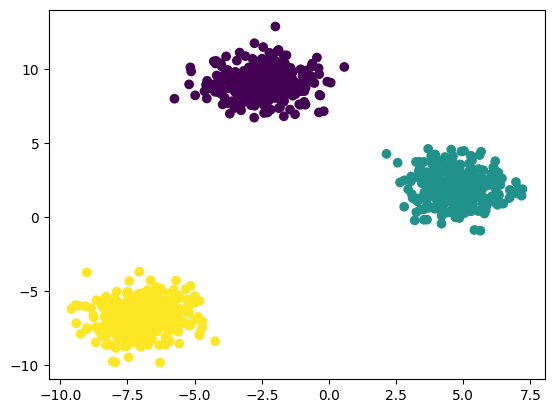

In [15]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Split data

In [11]:
# split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## standardization make all features in same scale

In [42]:
#  standardization -feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Find best K-value

In [14]:
from sklearn.cluster import KMeans

In [20]:
# Elbow Method to select K Value
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
wcss

[1599.9999999999998,
 508.7488689892823,
 51.75322236627205,
 44.28167293522465,
 37.395342637023134,
 31.164339519303848,
 28.57623271752564,
 30.440636018543373,
 24.241023814867916,
 22.867707558554358]

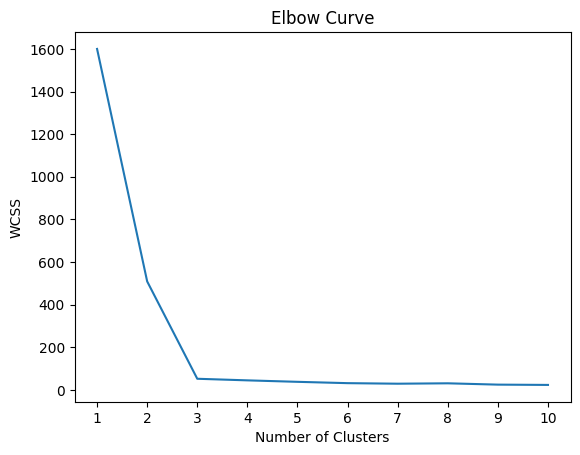

In [25]:
# plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

after we apply elbow method we find k=3 it's best choice

## Modeling

In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [27]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [28]:
y_pred = kmeans.predict(X_test_scaled)

In [29]:
y_pred

array([1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1,
       1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2,
       1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1,
       0, 1], dtype=int32)

## Visualize the clusters

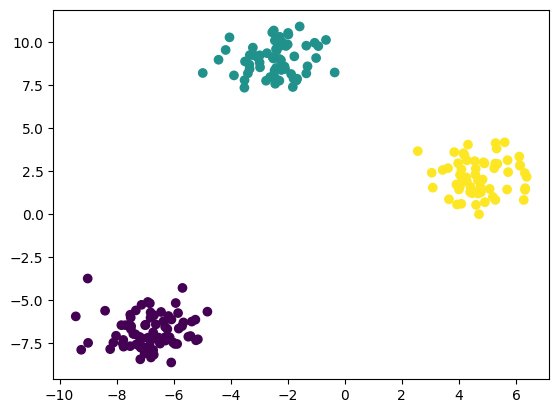

In [30]:
plt.scatter(X_test[:,0] , X_test[:,1], c=y_pred)
plt.show()

## Validation K Value

1. kneelocator
2. Slihoutee scoring

### 1. kneelocator

In [31]:
# kneelocator
! pip install kneed

In [32]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [33]:
k1.elbow

np.int64(3)

### 2. Slihoutee scoring

In [34]:
# Slihoutee scoring
from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficients = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [40]:
silhouette_coefficients

[np.float64(0.6851973424700912),
 np.float64(0.8424768202445475),
 np.float64(0.6776692108052798),
 np.float64(0.511543521246587),
 np.float64(0.34908450805467744),
 np.float64(0.3416775797179144),
 np.float64(0.4910289466549517),
 np.float64(0.3317459035847656),
 np.float64(0.31916188237373405)]

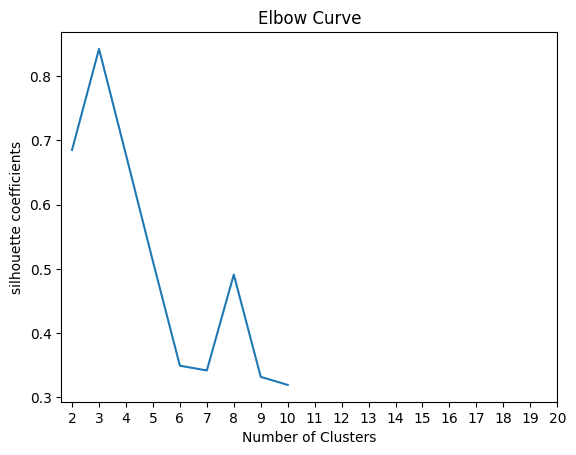

In [41]:
# plot elbow curve
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,21))
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette coefficients')
plt.show()

we see where curve high and do predictin on x_labcl and find k_value